In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams.update({'font.size': 18})

In [10]:
#LAr temperature
T = 89
# density
rho = -0.00615 * T + 1.928
print 'calculated density is %.03f [g/cm^3]'%rho
rho = 1.383

fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

Enominal = 0.273

# recombination model
def RecombModBox(dEdx, A=fModBoxA, B=fModBoxB, Efield=Enominal):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A=fRecombA, k=fRecombk, Efield=Enominal):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1-1/r


print 'R @ 2.1 MeV/cm : %.04f'%RecombModBox(2.1,fModBoxA,fModBoxB,Enominal)

RecombModBox_v = np.vectorize(RecombModBox)
RecombBirks_v  = np.vectorize(RecombBirks)

calculated density is 1.381 [g/cm^3]
R @ 2.1 MeV/cm : 0.3671


In [11]:
dedx = 2.3



efield_percent_v = np.linspace(-10,10,1000)
recomb_v = []

dEdx_v = np.linspace(1,10,100)
R_box_v = []
R_birks_v = []

for dEdx in dEdx_v:
    R_box_v.append  (RecombModBox(dEdx, fModBoxA, fModBoxB, Enominal))
    R_birks_v.append(RecombBirks (dEdx, fRecombA, fRecombk, Enominal))

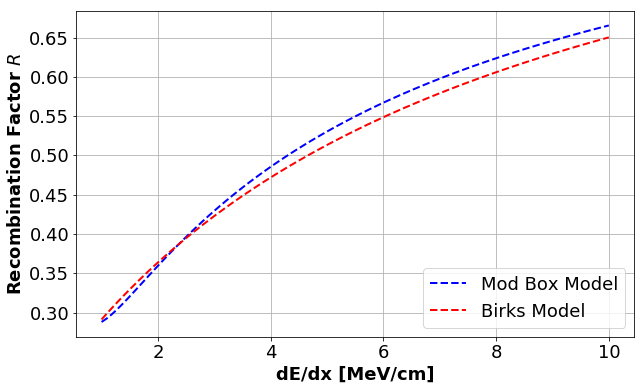

In [12]:
fig = plt.figure(figsize=(10,6))
plt.plot(dEdx_v,R_box_v,'b--',lw=2,label='Mod Box Model')
plt.plot(dEdx_v,R_birks_v,'r--',lw=2,label='Birks Model')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontweight='bold',fontsize=18)
plt.ylabel('Recombination Factor $R$',fontweight='bold',fontsize=18)
plt.legend(loc=4)
plt.show()